LetsGrowMore Virtual Internship Program (VIP) - February 2023

Beginner Level

Task-2 : Stock Price Prediction and Forecasting Using(Stacked LSTM)

Name : Vedant Panchal

In [1]:
# Importing The Libraries
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
     

In [2]:
# Reading The Dataset
dataset=pd.read_csv("NSE-TATAGLOBAL.csv")
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN


In [3]:
# Sorting The Values According To The Order Of Date
dataset["Date"]=pd.to_datetime(dataset["Date"])
data=dataset.sort_values(by="Date")
data.reset_index(inplace=True)
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63,NaN
1,1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04,NaN
2,1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44,NaN
3,1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87,NaN
4,2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85,NaN


In [4]:
# Sorting The Values According To The Order Of Date
dataset["Date"]=pd.to_datetime(dataset["Date"])
data=dataset.sort_values(by="Date")
data.reset_index(inplace=True)
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63,NaN
1,1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04,NaN
2,1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44,NaN
3,1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87,NaN
4,2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85,NaN


In [7]:
# Isolating The Close Column Of The Dataset
data_new=data.reset_index()["Close"]

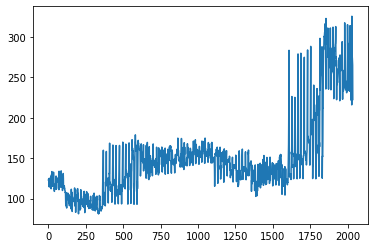

In [8]:

# Visualising The Dataset With The Close Price Column
plt.plot(data_new)

In [9]:
# Scaling The Dataset Values To a Range (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_new=scaler.fit_transform(np.array(data_new).reshape(-1,1))
     


In [10]:
print(data_new)

[[0.17177288]
 [0.17381536]
 [0.17810458]
 ...
 [0.76245915]
 [0.75265523]
 [0.57883987]]


In [11]:
# Splitting The Dataset Into Training Set & Test Set
training_size=int(len(data_new)*0.65)
test_size=len(data_new)-training_size
train_data,test_data=data_new[0:training_size,:],data_new[training_size:len(data_new),:1]
     

In [12]:
training_size,test_size

(1322, 713)

In [13]:
train_data

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.2183415 ],
       [0.2318219 ],
       [0.17279412]])

In [14]:
test_data

array([[0.19178922],
       [0.21343954],
       [0.19219771],
       [0.19281046],
       [0.21058007],
       [0.19526144],
       [0.20404412],
       [0.21589052],
       [0.2124183 ],
       [0.21813725],
       [0.22058824],
       [0.22875817],
       [0.23120915],
       [0.3120915 ],
       [0.30330882],
       [0.32291667],
       [0.25285948],
       [0.19281046],
       [0.2128268 ],
       [0.21895425],
       [0.21813725],
       [0.21609477],
       [0.22712418],
       [0.25020425],
       [0.24897876],
       [0.25306373],
       [0.24611928],
       [0.24938725],
       [0.26082516],
       [0.25776144],
       [0.24897876],
       [0.26715686],
       [0.26654412],
       [0.26736111],
       [0.18647876],
       [0.11417484],
       [0.16993464],
       [0.15155229],
       [0.22038399],
       [0.24530229],
       [0.24571078],
       [0.23549837],
       [0.16727941],
       [0.22324346],
       [0.21691176],
       [0.1942402 ],
       [0.16707516],
       [0.185

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [17]:
# Reshaping the data variables to fit the Stacked LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_train.shape[1],1)

In [18]:

# Making The Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
modelLSTM=Sequential()
modelLSTM.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
modelLSTM.add(LSTM(50,return_sequences=True))
modelLSTM.add(LSTM(50))
modelLSTM.add(Dense(1))
modelLSTM.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
# Observing The Summary Of The Model
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:

# Fitting The Data To The Stacked LSTM Model
modelLSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)
     

Epoch 1/100
20/20 [==============================] - 14s 359ms/step - loss: 0.0103 - val_loss: 0.0329
Epoch 2/100
20/20 [==============================] - 5s 234ms/step - loss: 0.0030 - val_loss: 0.0177
Epoch 3/100
20/20 [==============================] - 5s 236ms/step - loss: 0.0026 - val_loss: 0.0155
Epoch 4/100
20/20 [==============================] - 7s 339ms/step - loss: 0.0025 - val_loss: 0.0238
Epoch 5/100
20/20 [==============================] - 5s 242ms/step - loss: 0.0026 - val_loss: 0.0158
Epoch 6/100
20/20 [==============================] - 7s 337ms/step - loss: 0.0025 - val_loss: 0.0173
Epoch 7/100
20/20 [==============================] - 5s 241ms/step - loss: 0.0025 - val_loss: 0.0185
Epoch 8/100
20/20 [==============================] - 6s 306ms/step - loss: 0.0025 - val_loss: 0.0201
Epoch 9/100
20/20 [==============================] - 5s 269ms/step - loss: 0.0026 - val_loss: 0.0176
Epoch 10/100
20/20 [==============================] - 5s 271ms/step - loss: 0.0025 - val_l

In [28]:
import tensorflow as tf
import math
train_predict=modelLSTM.predict(X_train)
test_predict=modelLSTM.predict(X_test)

20/20 [==============================] - 1s 51ms/step


In [29]:
# Change The Current Form To The Original Dataset Form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
# Calculate The Perfomance Metrics Using Root Mean Squared Error (Training Set)
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

132.24057888033644

In [31]:
# Calculate The Perfomance Metrics Using Root Mean Squared Error (Test Set)
math.sqrt(mean_squared_error(y_test,test_predict))

174.30001237190757

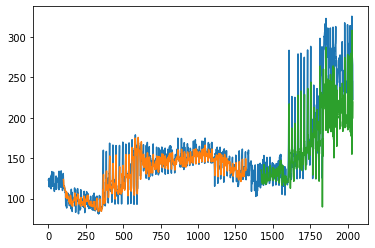


Blue line represents the whole dataset


Orange line shos the predictions on the train dataset


Green line shows the predictions on the test dataset



In [32]:
# Plotting The Prediction Of The Train Data & Test Data Along With The Full Dataset
look_back=100
trainpredictplot=numpy.empty_like(data_new)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#------------------------------
testpredictplot=numpy.empty_like(data_new)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data_new)-1,:]=test_predict
#------------------------------
plt.plot(scaler.inverse_transform(data_new))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()
print("\nBlue line represents the whole dataset\n")
print("\nOrange line shos the predictions on the train dataset\n")
print("\nGreen line shows the predictions on the test dataset\n")
     

In [33]:
len(test_data)

713

In [34]:
# Reshaping The New Values For Forecasting 
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7587826797385622,
 0.7892156862745097,
 0.7832924836601307,
 0.7549019607843137,
 0.7571486928104576,
 0.647671568627451,
 0.5723039215686275,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.8137254901960784,
 0.7677696078431371,
 0.8711192810457515,
 0.7604166666666667,
 0.6399101307189542,
 0.5800653594771241,
 0.7269199346405228,
 0.6629901960784313,
 0.6819852941176472,
 0.6441993464052288,
 0.6215277777777778,
 0.6439950980392156,
 0.6631944444444445,
 0.6754493464052289,
 0.6370506535947713,
 0.6460375816993464,
 0.6589052287581699,
 0.6587009803921569,
 0.6779003267973858,
 0.9667075163398695,
 0.8149509803921569,
 0.78615196078431

In [37]:
# Forecasting The Stock Market Price For The Next 30 Days
from numpy import array
output_list=[]
step=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,step,1))
    yhat=modelLSTM.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    output_list.extend(yhat.tolist())
    i+=1
  else:
    x_input=x_input.reshape((1,step,1))
    yhat=modelLSTM.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    output_list.extend(yhat.tolist())
    i+=1
print(output_list)

[0.37528515]
101
1 day input [0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.75878268
 0.78921569 0.78329248 0.75490196 0.75714869 0.64767157 0.57230392
 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562
 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902
 0.76960784 0.81372549 0.76776961 0.87111928 0.76041667 0.63991013
 0.58006536 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.96670752 0.81495098 0.78615196 0.85273693
 0.75980392 0.63480392 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.95731209 0.80596405 0.76552288
 0.80412582 0.86213235 0.79370915 0.63868464 0.625      0.63582516
 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549
 0.62214052 0.62418301 0.95241013 0.79473039 0.83455882 0.79166667
 0.62336601 0.57618464 0.94914216

In [38]:
new_day=np.arange(1,101)
new_day_pred=np.arange(101,131)

In [39]:
len(data_new)

2035

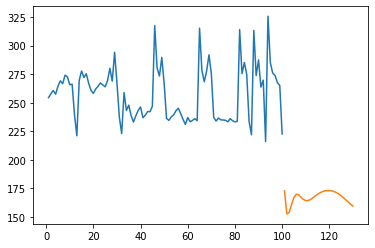

In [40]:
plt.plot(new_day,scaler.inverse_transform(data_new[1935:]))
plt.plot(new_day_pred,scaler.inverse_transform(output_list))

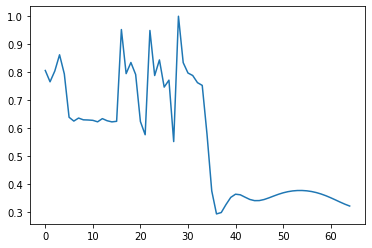

In [44]:
data_forecast=data_new.tolist()
data_forecast.extend(output_list)
plt.plot(data_forecast[2000:])

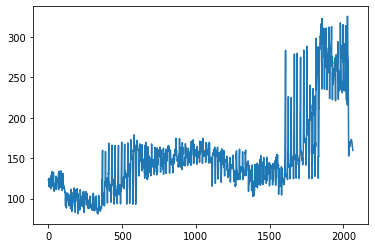

In [45]:
data_forecast=scaler.inverse_transform(data_forecast).tolist()
plt.plot(data_forecast)